**<font size="5">Red Wine Analysis</font>**<br><br>
Welcome to the journey of analysis of Wine Quality.<br>
*Lets get started*

**Please UPVOTE if it helps you.**

<font size="4">Importing Libraries (all together)</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score

<font size="4">Reading Data</font>

In [2]:
data=pd.read_csv('red_wine.csv')
# Reading Data 

In [3]:
data.head()
# Top 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()
# Information about data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()
# Statistical Analysis

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isnull().any()
# data[data.isnull()].count()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<font size="4">Correlation</font>

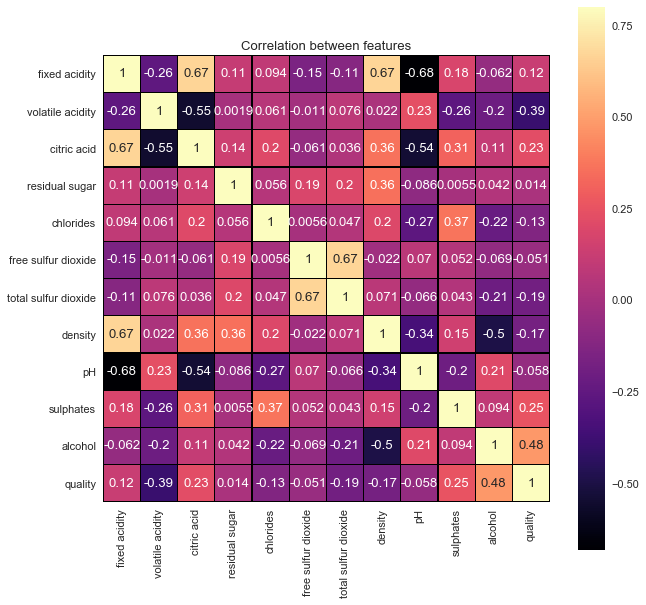

In [7]:
corr=data.corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='magma',linecolor="black")
plt.title('Correlation between features');

<font size="5">Output Variable</font>

In [8]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**<font size="5">Data Visualizations</font>**

<font size="4">Count Plot</font>

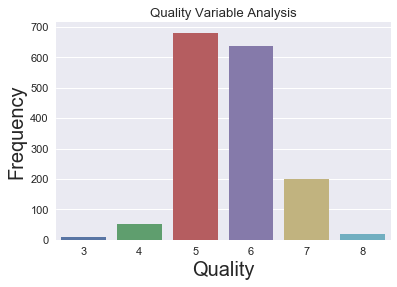

In [9]:
sns.countplot(x='quality',data=data)
plt.title('Quality Variable Analysis')
plt.xlabel('Quality').set_size(20)
plt.ylabel('Frequency').set_size(20)
plt.show()

<font size="4">Pair Plot</font>

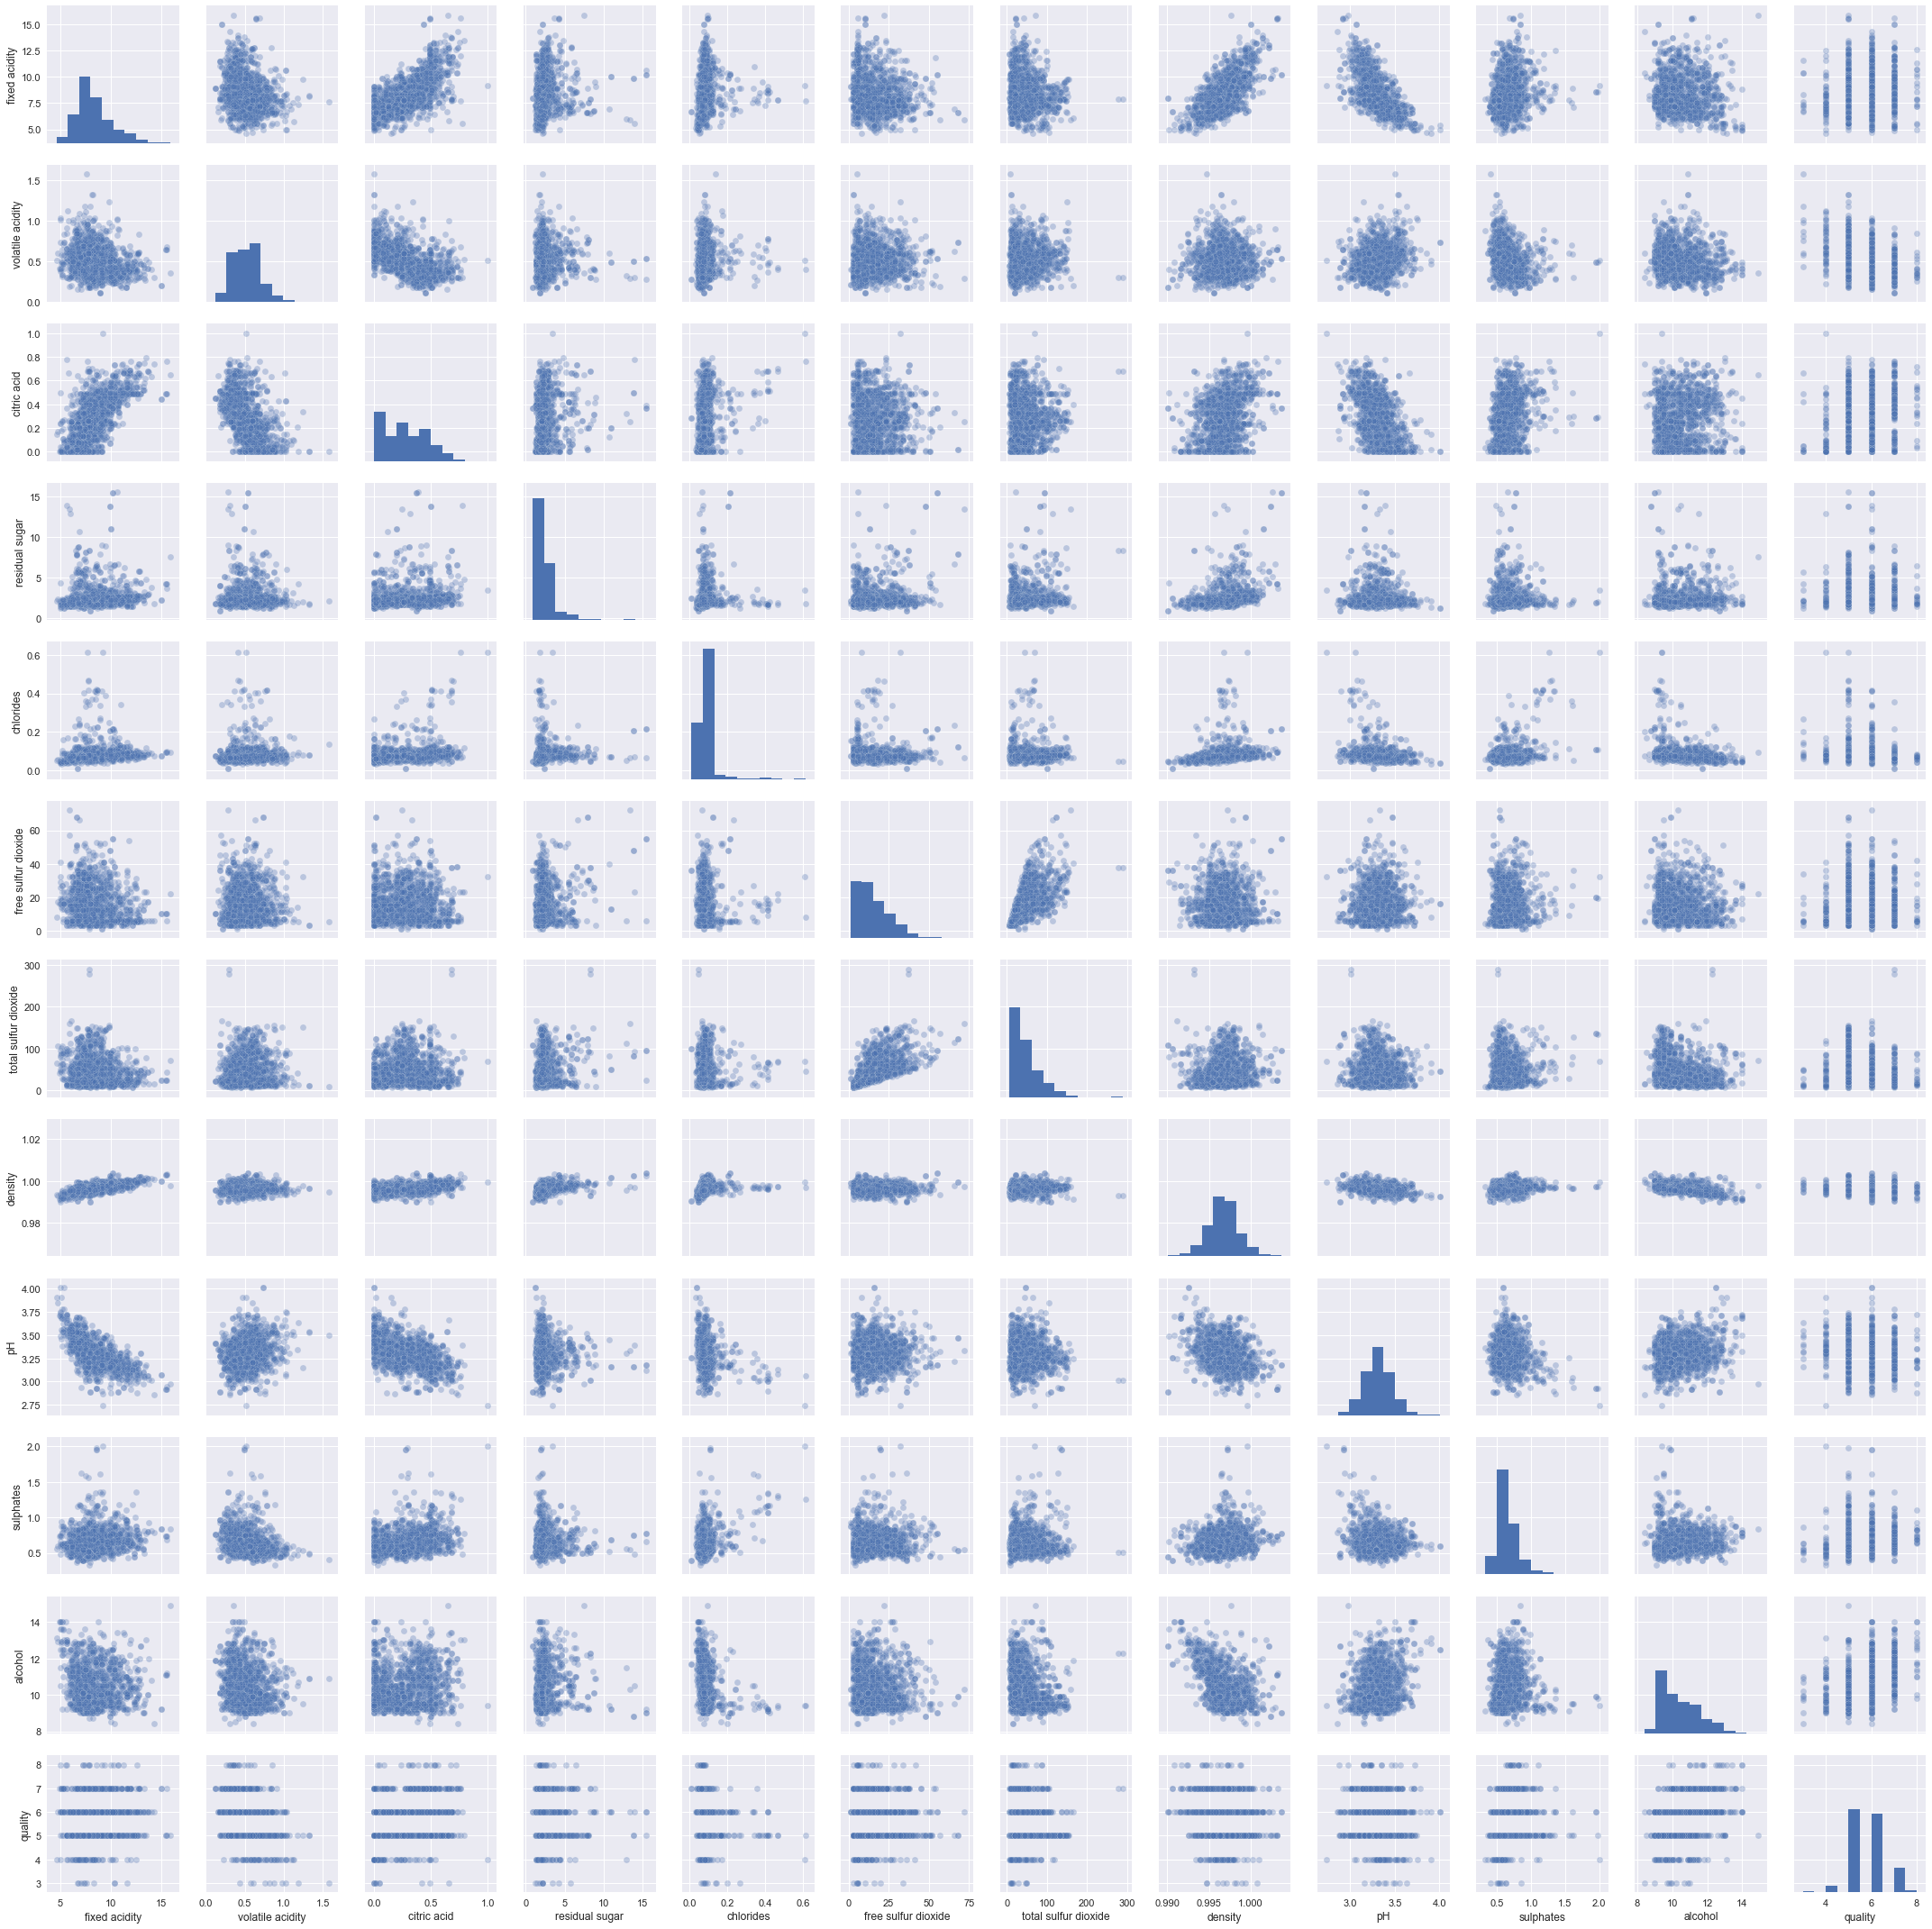

In [10]:
sns.pairplot(data,plot_kws={'alpha':0.3})
# data.hist(bins=50,figsize=(15,15))

<font size="4">Boxplot</font>

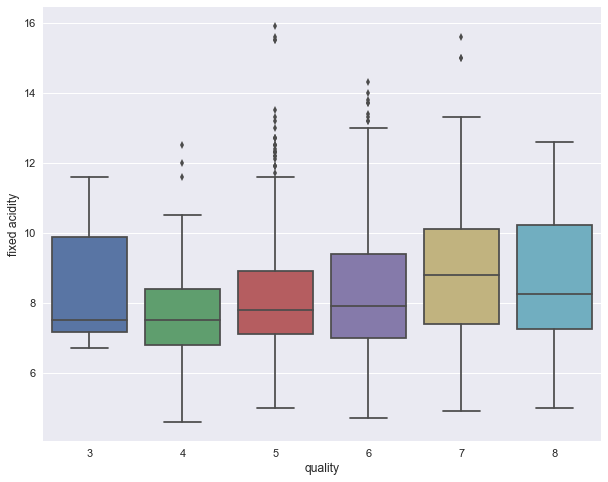

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(data['quality'],data['fixed acidity'])

<font size="4">Point Plot</font>

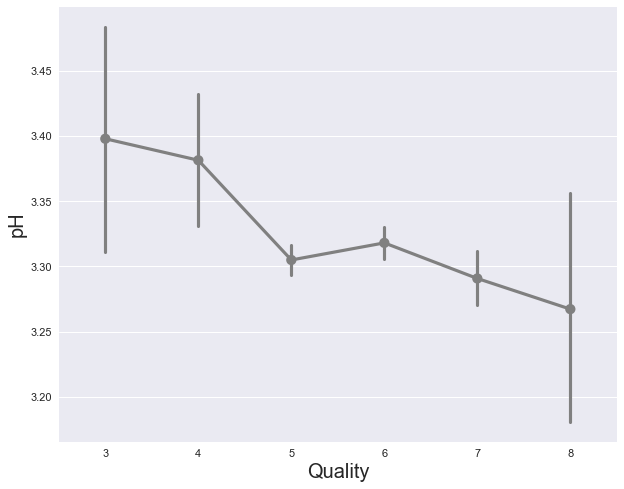

In [12]:
plt.figure(figsize=(10,8))
sns.pointplot(data['quality'],data['pH'],color='grey')
plt.xlabel('Quality').set_size(20)
plt.ylabel('pH').set_size(20)

<font size="4">Regression Plot</font>

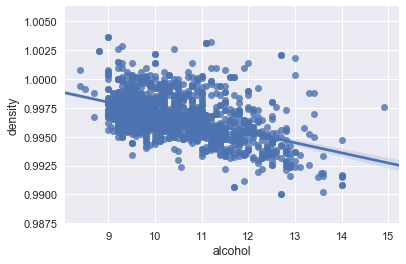

In [13]:
sns.regplot('alcohol','density',data=data)

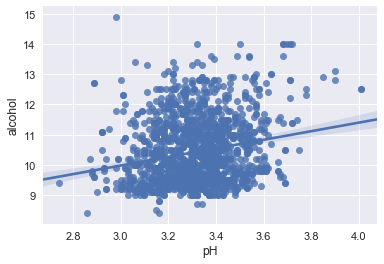

In [14]:
sns.regplot('pH','alcohol',data=data)

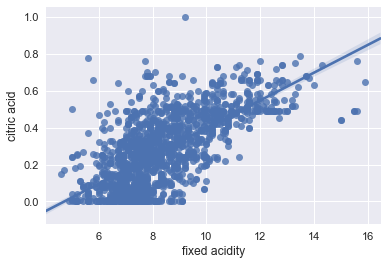

In [15]:
sns.regplot('fixed acidity','citric acid',data=data)

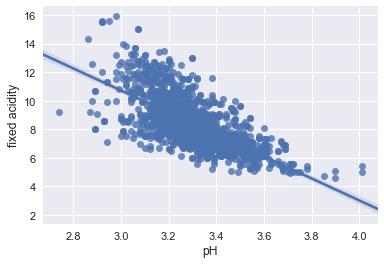

In [16]:
sns.regplot('pH','fixed acidity',data=data)

<font size="4">Dividing output variable into groups so that it can be easily **Classified**</font>

In [17]:
bins=[0,4,7,10]
labels=['bad','acceptable','good']
data['group']=pd.cut(data.quality,bins,3,labels=labels)

In [18]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,group
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,acceptable
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,acceptable
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,acceptable
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,acceptable
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,acceptable


In [19]:
data['group'].value_counts()

acceptable    1518
bad             63
good            18
Name: group, dtype: int64

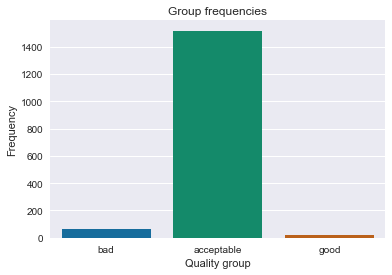

In [20]:
sns.set(palette='colorblind')
sns.countplot(x='group',data=data)
plt.title('Group frequencies')
plt.xlabel('Quality group')
plt.ylabel('Frequency')
plt.show()

**<font size="5">Prediction</font>**

In [21]:
X = data.iloc[:,:-2].values
y = data.iloc[:,-1].values

<font size="4">LabelEncoder</font>

In [22]:
y_le = LabelEncoder()
y = y_le.fit_transform(y)

<font size="4">Splitting Dataset</font>

In [23]:
pca = PCA(n_components=8)
x_new = pca.fit_transform(X)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(x_new,y,test_size=0.2,random_state=0)

<font size="4">Standardization of features</font>

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**<font size="5">SVM</font>**

In [30]:
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))

[[304   0   0]
 [ 13   0   0]
 [  3   0   0]]
0.95


**<font size="5">k-NN Algorithm</font>**

In [27]:
classifier = KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))

[[304   0   0]
 [ 13   0   0]
 [  3   0   0]]
0.95


**<font size="5">Logistic Regression</font>**

In [28]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
lr_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,lr_pred))
print(accuracy_score(y_test,lr_pred))

[[304   0   0]
 [ 13   0   0]
 [  3   0   0]]
0.95


**<font size="5">Thank You</font>**

**Please UPVOTE if it helps you.**